In [1]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
np.random.seed(42)

# Portfolio Planner

In this activity, you will use the iedfinance api to grab historical data for a 60/40 portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [3]:
from iexfinance.stocks import get_historical_data
import iexfinance as iex

# Data Collection

In this step, you will need to use the IEX api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [4]:
list_of_tickers = ["SPY", "AGG"]
# YOUR CODE HERE
end_date = datetime.now()
start_date = end_date + timedelta(-365)
df = get_historical_data(list_of_tickers, start_date, end_date,  output_format='pandas', token=os.getenv('IEX_TOKEN'))
df.drop(columns=['open', 'high', 'low', 'volume'], level=1, inplace=True)
df.head()


,SPY,AGG
,close,close
date,,
2018-10-01,291.73,105.24
2018-10-02,291.56,105.36
2018-10-03,291.72,104.86
2018-10-04,289.44,104.56
2018-10-05,287.82,104.33


# Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:
1. Calculate the daily returns for the SPY and AGG closing prices.
2. Calculate volatility for both the SPY and AGG closing prices.
3. Find the last day's closing price for both stocks and save those as variables.
4. Run a Monte Carlo Simulation of at least 100 iterations and generate at least 20 years of closing prices

### HINTS:
There are 252 trading days per year, so the number of records to generate for each Monte Carlo run will be 252 days * 20 years

In [5]:
# Calculate the daily roi for the stocks
# YOUR CODE HERE
daily_returns = df.pct_change()
daily_returns.head()

,SPY,AGG
,close,close
date,,
2018-10-01,NaN,NaN
2018-10-02,-0.000583,0.001140
2018-10-03,0.000549,-0.004746
2018-10-04,-0.007816,-0.002861
2018-10-05,-0.005597,-0.002200


In [6]:
# Calculate volatility
# YOUR CODE HERE
SPY_std = daily_returns.std()['SPY']['close']
AGG_std = daily_returns.std()['AGG']['close']
SPY_mean = daily_returns.mean()['SPY']['close']
AGG_mean = daily_returns.mean()['AGG']['close']

In [7]:
# Save the last day's closing price
# YOUR CODE HERE
SPY_last_price = df['SPY']['close'][-1]
AGG_last_price = df['AGG']['close'][-1]

In [8]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 20
monte_carlo = pd.DataFrame()

In [9]:
# Run the Monte Carlo Simulation
# YOUR CODE HERE
for x in range(number_simulations):
    simulated_SPY_prices = [SPY_last_price]
    simulated_AGG_prices = [AGG_last_price]
    simulated_price_df = pd.DataFrame()
    for i in range(number_records):
        simulated_SPY_price = simulated_SPY_prices[-1] * (1 + np.random.normal(SPY_mean, SPY_std))
        simulated_AGG_price = simulated_AGG_prices[-1] * (1 + np.random.normal(AGG_mean, AGG_std))
        
        simulated_SPY_prices.append(simulated_SPY_price)
        simulated_AGG_prices.append(simulated_AGG_price)
    
    simulated_price_df['SPY_prices'] = simulated_SPY_prices
    simulated_price_df['AGG_prices'] = simulated_AGG_prices
    
    simulated_daily_returns = simulated_price_df.pct_change()
    weights = [0.5, 0.5]
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    
    monte_carlo[f"simulation_{x+1}"] = (1 + portfolio_daily_returns.fillna(0)).cumprod()
    
    

In [10]:
monte_carlo.head()

,simulation_1,simulation_2,simulation_3,simulation_4,simulation_5,simulation_6,simulation_7,simulation_8,simulation_9,simulation_10,...,simulation_91,simulation_92,simulation_93,simulation_94,simulation_95,simulation_96,simulation_97,simulation_98,simulation_99,simulation_100
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.002705,1.008746,1.001278,0.992126,0.996827,0.996698,1.005903,0.994038,0.995080,1.010013,...,1.002637,0.994120,0.996215,0.994905,0.999717,1.001420,1.002766,0.995715,1.003533,1.005724
2,1.007858,1.011968,1.005713,0.990968,0.997767,0.999998,1.009121,0.997190,0.997233,1.003396,...,1.008625,0.996971,0.995617,0.993526,0.997121,1.001356,1.006786,0.992183,0.999287,1.015804
3,1.006573,1.015568,1.003390,0.994497,0.999843,0.996936,1.007979,0.999433,1.003278,1.007357,...,1.009288,1.005264,0.989201,0.988060,0.994652,1.004614,1.000064,1.000445,0.993374,1.023480
4,1.015985,1.009163,1.001799,0.990170,1.003299,0.998198,1.009309,0.995584,1.013390,1.005630,...,1.013631,1.003995,0.978178,0.988240,0.992111,1.012587,1.004996,0.994834,0.992766,1.016470


In [11]:
number_simulations = 100
number_records = 252 * 30
monte_carlo_30 = pd.DataFrame()

In [12]:
for x in range(number_simulations):
    simulated_SPY_prices = [SPY_last_price]
    simulated_AGG_prices = [AGG_last_price]
    simulated_price_df = pd.DataFrame()
    for i in range(number_records):
        simulated_SPY_price = simulated_SPY_prices[-1] * (1 + np.random.normal(SPY_mean, SPY_std))
        simulated_AGG_price = simulated_AGG_prices[-1] * (1 + np.random.normal(AGG_mean, AGG_std))
        
        simulated_SPY_prices.append(simulated_SPY_price)
        simulated_AGG_prices.append(simulated_AGG_price)
    
    simulated_price_df['SPY_prices'] = simulated_SPY_prices
    simulated_price_df['AGG_prices'] = simulated_AGG_prices
    
    simulated_daily_returns = simulated_price_df.pct_change()
    weights = [0.5, 0.5]
    portfolio_daily_returns = simulated_daily_returns.dot(weights)
    
    
    monte_carlo_30[f"simulation_{x+1}"] = (1 + portfolio_daily_returns.fillna(0)).cumprod()

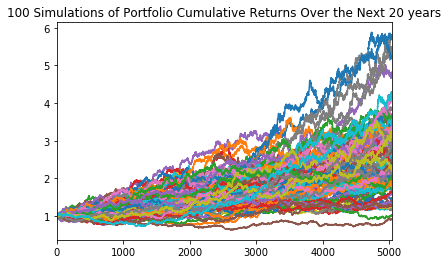

In [13]:
# Visualize the Simulation
# YOUR CODE HERE
plot_title = "100 Simulations of Portfolio Cumulative Returns Over the Next 20 years"
monte_carlo.plot(legend=None, title=plot_title)

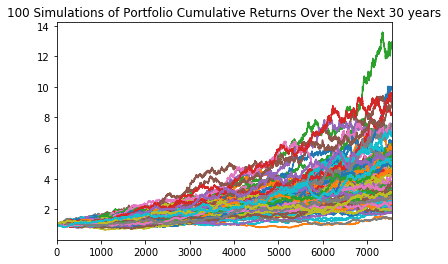

In [14]:
plot_title = "100 Simulations of Portfolio Cumulative Returns Over the Next 30 years"
monte_carlo_30.plot(legend=None, title=plot_title)

In [15]:
# Select the last row for the cumulative returns (cumulative returns at 30 years)
# YOUR CODE HERE
ending_cumulative_returns_30 = monte_carlo_30.iloc[-1,:]

In [16]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
# YOUR CODE HERE
ending_cumulative_returns = monte_carlo.iloc[-1,:]

In [17]:
# Display the 90% confidence interval for the ending returns
# YOUR CODE HERE
confidence_interval = ending_cumulative_returns.quantile(q=[0.05, 0.95])
confidence_interval_30 = ending_cumulative_returns_30.quantile(q=[0.05, 0.95])

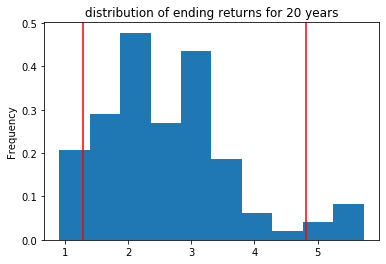

In [19]:
# Visualize the distribution of the ending returns
# YOUR CODE HERE
plt.figure();
ending_cumulative_returns.plot(kind='hist', density=True, bins=10, title="distribution of ending returns for 20 years")
plt.axvline(confidence_interval.iloc[0], color='r')
plt.axvline(confidence_interval.iloc[1], color='r')

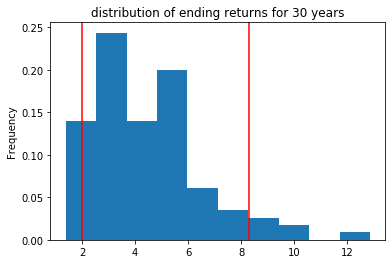

In [20]:
plt.figure();
ending_cumulative_returns_30.plot(kind='hist', density=True, bins=10, title="distribution of ending returns for 30 years")
plt.axvline(confidence_interval_30.iloc[0], color='r')
plt.axvline(confidence_interval_30.iloc[1], color='r')

---

# Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?
2. Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?
3. Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?
4. How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [21]:
# YOUR CODE HERE
expected_quantile = ending_cumulative_returns_30.quantile(q=[0.1,0.5,0.9])
expected_quantile

0.1    2.159846
0.5    4.168736
0.9    7.111397
Name: 7560, dtype: float64

### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [22]:
# YOUR CODE HERE
returns = expected_quantile * 20000
returns

0.1     43196.928671
0.5     83374.722213
0.9    142227.947418
Name: 7560, dtype: float64

### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [28]:
# YOUR CODE HERE
retirement_income = returns.iloc[0] * 0.04
projected_yearly_income = 6085
retirement_income >= projected_yearly_income

False

### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [31]:
# YOUR CODE HERE
expected_returns = expected_quantile * 20000 * 1.5
retirement_income = expected_returns.iloc[0] * 0.04
projected_yearly_income = 6085
retirement_income >= projected_yearly_income

False

### Optional Challenge

In this section, you will calculate and plot the cumulative returns for the median and 90% confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [ ]:
# YOUR CODE HERE